# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from st import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on=("Mouse ID"))

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(pd.unique(data_df["Mouse ID"]))


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_mouse_id = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

drop_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
unique_mouse = data_df.loc[data_df["Mouse ID"] == "g989"]
unique_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'].isin(drop_mouse_id)==False]

clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_data_df["Mouse ID"]))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
tumor_median = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()


# variance, 
standard_deviation_tumor = round(clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std(),2)
SEM_tumor_volume = st.sem(clean_data_df["Tumor Volume (mm3)"])

# Assemble the resulting series into a single summary DataFrame.
per_regimen_tumor = pd.DataFrame({"Average Mean of Tumor Volumne": tumor_mean,
                               "Average Median of Tumor Volumne": tumor_median,
                               "Standard Deviaion of Tumor Volumne": standard_deviation_tumor,
                                  "SEM of Tumor Volumne": SEM_tumor_volume})
per_regimen_tumor


,Average Mean of Tumor Volumne,Average Median of Tumor Volumne,Standard Deviaion of Tumor Volumne,SEM of Tumor Volumne
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.99,0.205591
Ceftamin,52.591172,51.776157,6.27,0.205591
Infubinol,52.884795,51.820584,6.57,0.205591
Ketapril,55.235638,53.698743,8.28,0.205591
Naftisol,54.331565,52.509285,8.13,0.205591
Placebo,54.033581,52.288934,7.82,0.205591
Propriva,52.320930,50.446266,6.62,0.205591
Ramicane,40.216745,40.673236,4.85,0.205591
Stelasyn,54.233149,52.431737,7.71,0.205591


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_data_df.groupby(clean_data_df["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "std", "sem"])

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

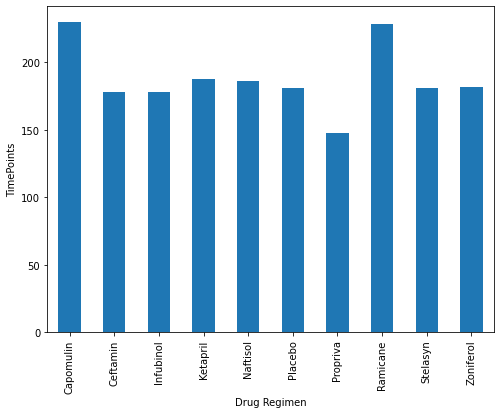

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

clean_data_df.groupby(["Drug Regimen"]).count()["Timepoint"].plot(kind='bar', figsize=(8,6))

# Set the xlabel and ylabel using class methods
plt.ylabel("TimePoints")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

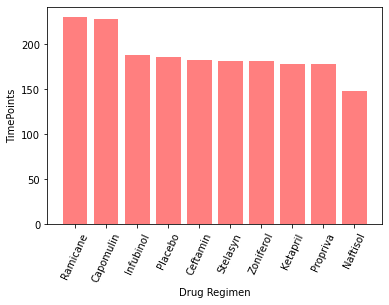

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_data_df["Drug Regimen"].unique()
y_axis = clean_data_df["Drug Regimen"].value_counts()

# plt.xticks(tick_locations, rotation='vertical')
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.ylabel("TimePoints") 
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 65)
plt.show()
# x_axis, y_axis.values

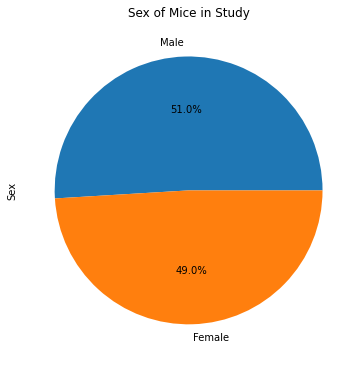

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# gender_data =loc(clean_data_df["Sex"]).count()

clean_data_df["Sex"].value_counts().plot(kind='pie', figsize=(6,8), autopct="%1.1f%%")
plt.title("Sex of Mice in Study")

plt.show()


# plt.tight_layout()


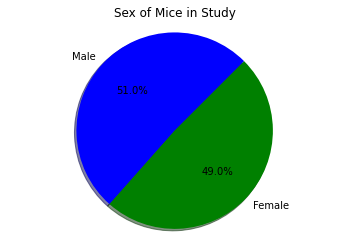

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
genders = clean_data_df["Sex"].value_counts()
colors = ["blue","green"]
explode = (0,0)

plt.pie(genders, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Print the final product to the screen
plt.title("Sex of Mice in Study")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = clean_data_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(clean_data_df, greatest, how='right', on=["Mouse ID", "Timepoint"])
four_drug_volumn = tumor_df.loc[(tumor_df["Drug Regimen"] =="Capomulin") | 
                                 (tumor_df["Drug Regimen"] =="Ramicane") | 
                                  (tumor_df["Drug Regimen"] =="Infubinol") | 
                                   (tumor_df["Drug Regimen"] =="Ceftamin"),
                                ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
                                                                                                                   
# four_drug_volumn, greatest

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_vol = four_drug_volumn.loc[four_drug_volumn["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ram_vol = four_drug_volumn.loc[four_drug_volumn["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
inf_vol = four_drug_volumn.loc[four_drug_volumn["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceft_vol = four_drug_volumn.loc[four_drug_volumn["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Capomulin
capomulin_quartiles = capo_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_IQR = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_IQR}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_IQR)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_IQR)

print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

outlier_capo = four_drug_volumn[(four_drug_volumn["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
                                 (four_drug_volumn["Tumor Volume (mm3)"] > capomulin_upper_bound)]
 
    
    # Ramicane
Ramicane_quartiles = ram_vol.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_IQR = Ramicane_upperq-capomulin_lowerq

print(f"The lower quartile of Ramicane is: {Ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {Ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {Ramicane_IQR}")
print(f"The the median of Ramicane is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_IQR)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_IQR)

print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

outlier_capo = four_drug_volumn[(four_drug_volumn["Tumor Volume (mm3)"] < Ramicane_lower_bound) | 
                                 (four_drug_volumn["Tumor Volume (mm3)"] > Ramicane_upper_bound)]

    # Infubinol
Infubinol_quartiles = inf_vol.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_IQR = Infubinol_upperq-Infubinol_lowerq

print(f"The lower quartile of Infubinol is: {Infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {Infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {Infubinol_IQR}")
print(f"The the median of Infubinol is: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_IQR)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_IQR)

print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

outlier_capo = four_drug_volumn[(four_drug_volumn["Tumor Volume (mm3)"] < Infubinol_lower_bound) | 
                                 (four_drug_volumn["Tumor Volume (mm3)"] > Infubinol_upper_bound)]

    # Ceftaminn
Ceftamin_quartiles = ceft_vol.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_IQR = Ceftamin_upperq-capomulin_lowerq

print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceftamin_IQR}")
print(f"The the median of Ceftamin is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_IQR)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_IQR)

print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

outlier_capo = four_drug_volumn[(four_drug_volumn["Tumor Volume (mm3)"] < Ceftamin_lower_bound) | 
                                 (four_drug_volumn["Tumor Volume (mm3)"] > Ceftamin_upper_bound)]
     
    
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 8.281649430000002
The the median of Ramicane is: 36.56165229 
Values below 19.137995404999998 could be outliers.
Values above 53.081480415 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquar

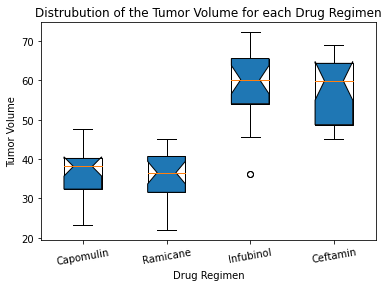

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

drug_treatment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_volum = [capo_vol,ram_vol,inf_vol,ceft_vol]
fig, ax = plt.subplots()
box = ax.boxplot(tumor_volum, notch=True, patch_artist=True)
ax.boxplot(tumor_volum)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol","Ceftamin"], rotation=10)
plt.xlabel("Drug Regimen") 
plt.ylabel("Tumor Volume")
plt.title("Distrubution of the Tumor Volume for each Drug Regimen")
plt.show() 


## Line and Scatter Plots

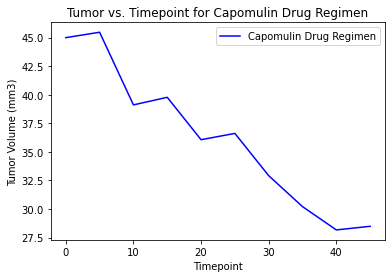

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_treatment = clean_data_df.loc[clean_data_df["Mouse ID"] == "x401"]
single_mice = capo_treatment.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# store value for x and y axis
capo_timepointx = single_mice['Timepoint']
capo_tumor_voly = single_mice['Tumor Volume (mm3)']

plt.plot(capo_timepointx, capo_tumor_voly, color="blue", label = "Capomulin Drug Regimen")
plt.title("Tumor vs. Timepoint for Capomulin Drug Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

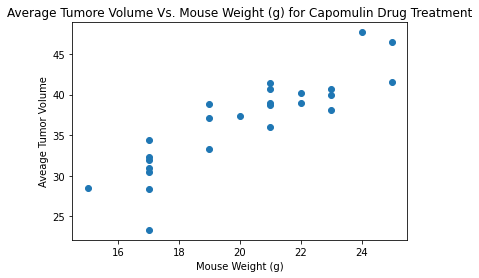

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = four_drug_volumn.loc[four_drug_volumn["Drug Regimen"] == "Capomulin"]
cap_tumor_avg = cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
# rename the Tumor volume (mm3) column
cap_tumor_avg = cap_tumor_avg.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
# scatter plot
plt.scatter(cap_tumor_avg["Weight (g)"], cap_tumor_avg["Average Volume"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Aveage Tumor Volume")
plt.title("Average Tumore Volume Vs. Mouse Weight (g) for Capomulin Drug Treatment")
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
tumor_vol = cap_tumor_avg["Average Volume"]
weight = cap_tumor_avg["Weight (g)"]
correlation = st.pearsonr(tumor_vol,weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.88


In [19]:
# linear regression model tumor_vol = capo_tumor_avg["Tumor Volume (mm3)"]

x_value = cap_tumor_avg["Weight (g)"]
y_value = cap_tumor_avg["Average Volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

NameError: name 'linregress' is not defined